In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Loan_Approval.csv",header=None)

In [4]:
data.shape

(600, 3)

In [5]:
data[2].value_counts()

0    300
1    300
Name: 2, dtype: int64

Balanced data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [7]:
data[[0,1]]

,0,1
0,-17.897000,7.662423
1,-26.343161,-3.055257
2,-19.059771,-8.531838
3,-16.383898,-2.352667
4,-12.926541,9.074994
...,...,...
595,4.782462,-29.002590
596,3.990671,-27.664533
597,1.968937,-27.666538
598,0.397395,-28.864856


C:\Users\kusumitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

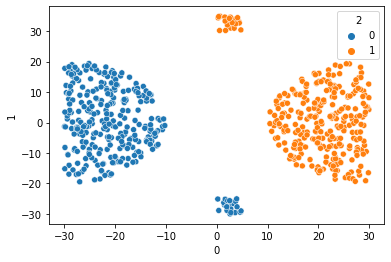

In [8]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(480, 2) (480,)
(120, 2) (120,)


In [10]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Rescaling X test and X_train

In [11]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)
pd.DataFrame(x_trainf).head()

,0,1
0,-1.323615,-0.170642
1,1.067998,-0.837781
2,-0.898945,-0.391715
3,0.187509,2.630202
4,-0.910215,-0.303640


# Weights are Initialized zero

In [13]:
model=Sequential()
#By default kernal initializer is glorat initialization
model.add(Dense(3,activation="relu",use_bias = False,input_dim=2))
model.add(Dense(1,activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [15]:
#These are the weights intialized directly we are trying to initialize it as zeroes first before calculating original weights
model.get_weights()

[array([[0.12258959, 0.89458156, 0.65861905],
        [0.8272811 , 0.9701879 , 0.92800665]], dtype=float32),
 array([[-0.9021657 ],
        [-0.19360745],
        [ 0.8218392 ]], dtype=float32),
 array([0.], dtype=float32)]

In [16]:
wei = model.get_weights()

In [17]:
wei

[array([[0.12258959, 0.89458156, 0.65861905],
        [0.8272811 , 0.9701879 , 0.92800665]], dtype=float32),
 array([[-0.9021657 ],
        [-0.19360745],
        [ 0.8218392 ]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
wei[0]=np.zeros(wei[0].shape)
wei[1]=np.zeros(wei[1].shape)
wei[2]=np.zeros(wei[2].shape)

In [19]:
wei

[array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([[0.],
        [0.],
        [0.]]),
 array([0.])]

In [20]:
model.set_weights(wei)

In [21]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [22]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
history=model.fit(x_trainf,y_train,batch_size=50,epochs=50,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 48ms/step - loss: 0.6932 - accuracy: 0.4896 - val_loss: 0.6932 - val_accuracy: 0.4896
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 8/50
8/8 [=================

In [24]:
#Atlast also all the weights are 0 when initialized zero it doesnt care about activation fn or epochs
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.0373482], dtype=float32)]

 #  All Weights are  Initialized constant(same number)

In [25]:
model=Sequential()
#By default kernal initializer is glorat initialization
model.add(Dense(3,activation="relu",use_bias = False,input_dim=2))
model.add(Dense(1,activation="sigmoid"))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [27]:
#These are the weights intialized directly we are trying to initialize it as constant first before calculating original weights
model.get_weights()

[array([[ 0.7920116 ,  0.18709934, -0.07376695],
        [ 0.29820907, -0.7805839 ,  0.95809436]], dtype=float32),
 array([[ 0.47086954],
        [-0.43327016],
        [-0.9615674 ]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
wei = model.get_weights()

In [29]:
wei

[array([[ 0.7920116 ,  0.18709934, -0.07376695],
        [ 0.29820907, -0.7805839 ,  0.95809436]], dtype=float32),
 array([[ 0.47086954],
        [-0.43327016],
        [-0.9615674 ]], dtype=float32),
 array([0.], dtype=float32)]

In [30]:
wei[0]=np.ones(wei[0].shape)
wei[1]=np.ones(wei[1].shape)
wei[2]=np.ones(wei[2].shape)

In [31]:
wei

[array([[1., 1., 1.],
        [1., 1., 1.]]),
 array([[1.],
        [1.],
        [1.]]),
 array([1.])]

In [32]:
model.set_weights(wei)

In [33]:
model.get_weights()

[array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32),
 array([[1.],
        [1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [34]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [35]:
history=model.fit(x_trainf,y_train,batch_size=50,epochs=50,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 41ms/step - loss: 0.7128 - accuracy: 0.5104 - val_loss: 0.7093 - val_accuracy: 0.5104
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7073 - accuracy: 0.5104 - val_loss: 0.7035 - val_accuracy: 0.5104
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.7017 - accuracy: 0.5104 - val_loss: 0.6979 - val_accuracy: 0.5104
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6962 - accuracy: 0.5104 - val_loss: 0.6924 - val_accuracy: 0.5104
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6911 - accuracy: 0.5104 - val_loss: 0.6871 - val_accuracy: 0.5104
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6864 - accuracy: 0.5104 - val_loss: 0.6818 - val_accuracy: 0.5104
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6815 - accuracy: 0.5104 - val_loss: 0.6763 - val_accuracy: 0.5104
Epoch 8/50
8/8 [===============

In [36]:
model.get_weights()

[array([[1.2556857 , 1.2556857 , 1.2556857 ],
        [0.75350374, 0.75350374, 0.75350374]], dtype=float32),
 array([[1.3328619],
        [1.3328619],
        [1.3328619]], dtype=float32),
 array([0.61141694], dtype=float32)]

Here in every layer all the 3 weights are same it means when we initialize weights as constant all the weights acts as single weight

# Sigmoid Activation Fn sgd optimizer

In [60]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",kernel_initializer="random_uniform",input_dim=2))

model.add(Dense(4,activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))

In [61]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 3)                 9         
                                                                 
 dense_14 (Dense)            (None, 4)                 16        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


#We are using Stochastic Gradient Descent
And output variable is binary, so we use Binary_cross entropy loss fn.

In [62]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [63]:
history=model.fit(x_trainf,y_train,batch_size=50,epochs=30,validation_split=0.2)

Epoch 1/30
8/8 [==============================] - 1s 43ms/step - loss: 0.6923 - accuracy: 0.4896 - val_loss: 0.6923 - val_accuracy: 0.4896
Epoch 2/30
8/8 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.4896 - val_loss: 0.6922 - val_accuracy: 0.4896
Epoch 3/30
8/8 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.4896 - val_loss: 0.6921 - val_accuracy: 0.4896
Epoch 4/30
8/8 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.4974 - val_loss: 0.6920 - val_accuracy: 0.4896
Epoch 5/30
8/8 [==============================] - 0s 9ms/step - loss: 0.6918 - accuracy: 0.5208 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 6/30
8/8 [==============================] - 0s 9ms/step - loss: 0.6916 - accuracy: 0.6302 - val_loss: 0.6917 - val_accuracy: 0.6042
Epoch 7/30
8/8 [==============================] - 0s 8ms/step - loss: 0.6916 - accuracy: 0.6771 - val_loss: 0.6916 - val_accuracy: 0.8750
Epoch 8/30
8/8 [=================

In [64]:
y_pred=model.predict(x_testf)

if y_pred is greater than 0.5 we make it 1 else 0

In [65]:
y_predf=np.where(y_pred>0.5,1,0)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.4583333333333333

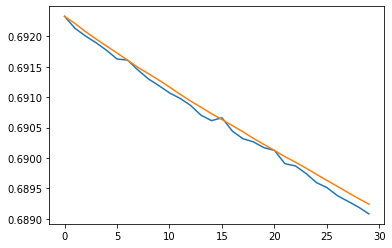

In [67]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [68]:
pip install mlxtend

^C
Note: you may need to restart the kernel to use updated packages.


In [28]:
import mlxtend

In [69]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

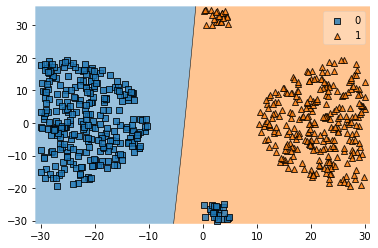

In [70]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

C:\Users\kusumitha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

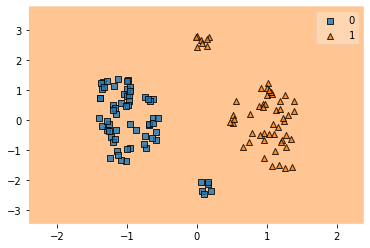

In [71]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Sigmoid Fn with optimizer adam

In [32]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=2))

model.add(Dense(4,activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [35]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6802 - accuracy: 0.4922 - val_loss: 0.6751 - val_accuracy: 0.5208
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.6734 - accuracy: 0.5078 - val_loss: 0.6694 - val_accuracy: 0.5729
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6665 - accuracy: 0.5651 - val_loss: 0.6631 - val_accuracy: 0.6042
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6597 - accuracy: 0.6771 - val_loss: 0.6562 - val_accuracy: 0.7708
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.7995 - val_loss: 0.6485 - val_accuracy: 0.8333
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.8568 - val_loss: 0.6396 - val_accuracy: 0.9062
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.9141 - val_loss: 0.6302 - val_accuracy: 0.9271
Epoch 8/20
39/39 [=

In [36]:
y_pred=model.predict(x_testf)

In [37]:
y_predf=np.where(y_pred>0.5,1,0)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

1.0

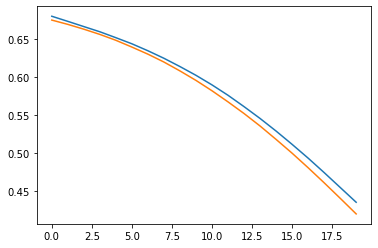

In [39]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

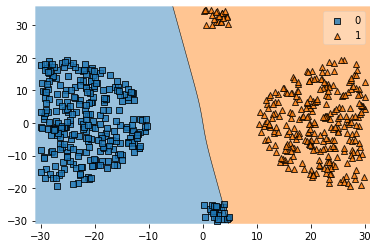

In [40]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

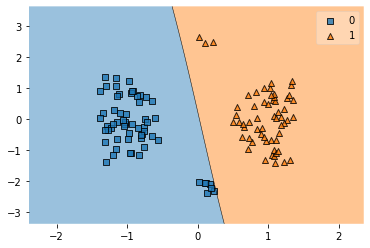

In [41]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Tanh Act Fn with sgd optimizer and 

In [86]:
model=Sequential()
model.add(Dense(3,activation="tanh",input_dim=2))

model.add(Dense(4,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

In [87]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 3)                 9         
                                                                 
 dense_19 (Dense)            (None, 4)                 16        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [90]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=30,validation_split=0.2)

Epoch 1/30
39/39 [==============================] - 0s 5ms/step - loss: 0.2969 - accuracy: 0.9193 - val_loss: 0.2712 - val_accuracy: 0.9271
Epoch 2/30
39/39 [==============================] - 0s 4ms/step - loss: 0.2772 - accuracy: 0.9193 - val_loss: 0.2516 - val_accuracy: 0.9271
Epoch 3/30
39/39 [==============================] - 0s 4ms/step - loss: 0.2590 - accuracy: 0.9193 - val_loss: 0.2335 - val_accuracy: 0.9271
Epoch 4/30
39/39 [==============================] - 0s 4ms/step - loss: 0.2418 - accuracy: 0.9193 - val_loss: 0.2160 - val_accuracy: 0.9271
Epoch 5/30
39/39 [==============================] - 0s 4ms/step - loss: 0.2245 - accuracy: 0.9193 - val_loss: 0.1976 - val_accuracy: 0.9271
Epoch 6/30
39/39 [==============================] - 0s 4ms/step - loss: 0.2055 - accuracy: 0.9193 - val_loss: 0.1786 - val_accuracy: 0.9271
Epoch 7/30
39/39 [==============================] - 0s 4ms/step - loss: 0.1854 - accuracy: 0.9219 - val_loss: 0.1580 - val_accuracy: 0.9583
Epoch 8/30
39/39 [==

In [91]:
y_pred=model.predict(x_testf)

In [92]:
y_predf=np.where(y_pred>0.5,1,0)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

1.0

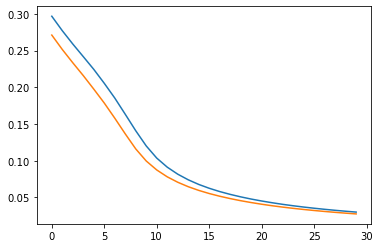

In [94]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

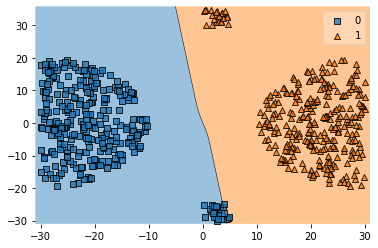

In [95]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

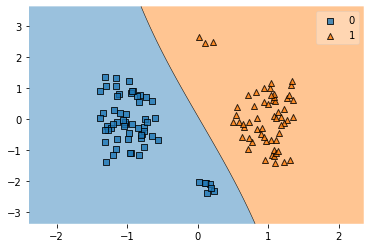

In [96]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Tanh Act Fn with adam optimizer

In [52]:
model=Sequential()
model.add(Dense(3,activation="tanh",input_dim=2))

model.add(Dense(4,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 dense_10 (Dense)            (None, 4)                 16        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [55]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
39/39 [==============================] - 1s 16ms/step - loss: 0.7289 - accuracy: 0.4609 - val_loss: 0.6719 - val_accuracy: 0.6250
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5339 - val_loss: 0.6350 - val_accuracy: 0.6562
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6094 - val_loss: 0.5993 - val_accuracy: 0.7292
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6084 - accuracy: 0.6979 - val_loss: 0.5611 - val_accuracy: 0.8229
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5647 - accuracy: 0.7917 - val_loss: 0.5162 - val_accuracy: 0.8854
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5154 - accuracy: 0.9062 - val_loss: 0.4672 - val_accuracy: 0.9792
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4614 - accuracy: 1.0000 - val_loss: 0.4142 - val_accuracy: 1.0000
Epoch 8/20
39/39 [=

In [56]:
y_pred=model.predict(x_testf)

In [57]:
y_predf=np.where(y_pred>0.5,1,0)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

1.0

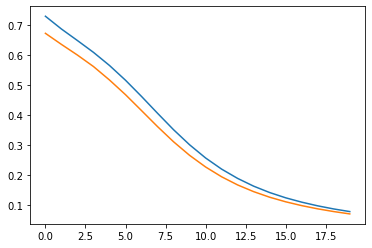

In [59]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

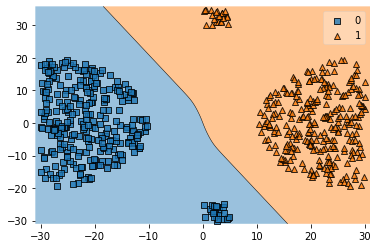

In [60]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

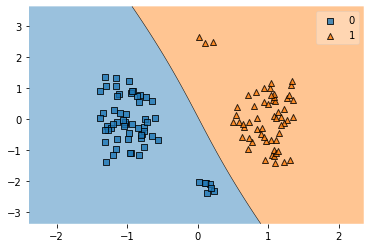

In [61]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Relu Act Fn with sgd optimizer and kernel Initializer as he_uniform

In [37]:
#he_unifrom Initializer is used and works well only for relu Activation function
model=Sequential()
model.add(Dense(3,activation="relu",kernel_initializer="he_uniform",input_dim=2))

model.add(Dense(4,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 9         
                                                                 
 dense_7 (Dense)             (None, 4)                 16        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [40]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=30,validation_split=0.2)

Epoch 1/30
39/39 [==============================] - 1s 10ms/step - loss: 0.9685 - accuracy: 0.7370 - val_loss: 0.7458 - val_accuracy: 0.8333
Epoch 2/30
39/39 [==============================] - 0s 6ms/step - loss: 0.7391 - accuracy: 0.7865 - val_loss: 0.6254 - val_accuracy: 0.8542
Epoch 3/30
39/39 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.8203 - val_loss: 0.5551 - val_accuracy: 0.8542
Epoch 4/30
39/39 [==============================] - 0s 5ms/step - loss: 0.5585 - accuracy: 0.8516 - val_loss: 0.5067 - val_accuracy: 0.8542
Epoch 5/30
39/39 [==============================] - 0s 5ms/step - loss: 0.5090 - accuracy: 0.8698 - val_loss: 0.4625 - val_accuracy: 0.8958
Epoch 6/30
39/39 [==============================] - 0s 5ms/step - loss: 0.4626 - accuracy: 0.8984 - val_loss: 0.4194 - val_accuracy: 0.9167
Epoch 7/30
39/39 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.9167 - val_loss: 0.3799 - val_accuracy: 0.9479
Epoch 8/30
39/39 [=

In [41]:
y_pred=model.predict(x_testf)

In [42]:
y_predf=np.where(y_pred>0.5,1,0)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

1.0

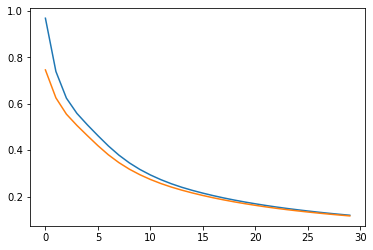

In [44]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

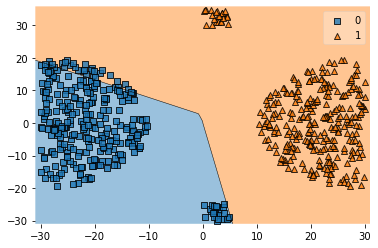

In [47]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

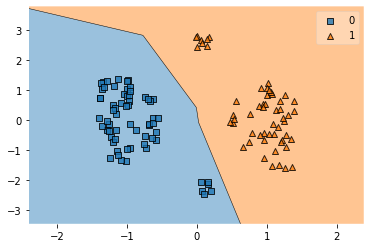

In [48]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Relu Act Fn with adam optimizer and kernel initializer he_uniform

In [49]:
model=Sequential()
model.add(Dense(3,activation="relu",kernel_initializer="he_uniform",input_dim=2))

model.add(Dense(4,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 dense_10 (Dense)            (None, 4)                 16        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [52]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=30,validation_split=0.2)

Epoch 1/30
39/39 [==============================] - 1s 10ms/step - loss: 0.7702 - accuracy: 0.6458 - val_loss: 0.7293 - val_accuracy: 0.6771
Epoch 2/30
39/39 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.7083 - val_loss: 0.6627 - val_accuracy: 0.6875
Epoch 3/30
39/39 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.7552 - val_loss: 0.6065 - val_accuracy: 0.7604
Epoch 4/30
39/39 [==============================] - 0s 4ms/step - loss: 0.5970 - accuracy: 0.7969 - val_loss: 0.5535 - val_accuracy: 0.7917
Epoch 5/30
39/39 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.8255 - val_loss: 0.5098 - val_accuracy: 0.8333
Epoch 6/30
39/39 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.8698 - val_loss: 0.4718 - val_accuracy: 0.8750
Epoch 7/30
39/39 [==============================] - 0s 4ms/step - loss: 0.4762 - accuracy: 0.8958 - val_loss: 0.4384 - val_accuracy: 0.9062
Epoch 8/30
39/39 [=

In [53]:
y_pred=model.predict(x_testf)

In [54]:
y_predf=np.where(y_pred>0.5,1,0)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

1.0

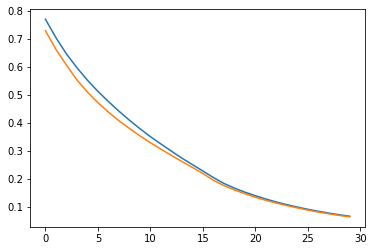

In [56]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

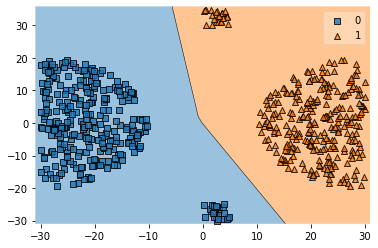

In [57]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

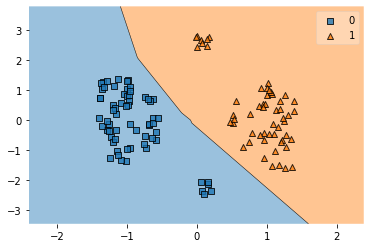

In [58]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Conclusion

### For this Dataset "Outlier" All the functions and optimizers are working well 